#### Logistic Regression from scratch

In [84]:
import numpy as np
import matplotlib.pyplot as plt

In [85]:
import numpy as np

class LogisticRegression:
    def __init__(self, X, y, w=None, b=None):
        """
        Initialize Logistic Regression model
        Args:
        X : (ndarray Shape (m, n)) data, m examples by n features
        y : (ndarray Shape (m,)) target values (0 or 1)
        w : (ndarray Shape (n,)) weights vector (optional)
        b : (scalar) bias (optional)
        """
        self.X = np.array(X)
        self.y = np.array(y)
        n_features = self.X.shape[1] if self.X.ndim > 1 else 1  # Handle 1D case
        self.w = w if w is not None else np.zeros(n_features)  # Weight vector
        self.b = b if b is not None else 0.0  # Bias term

    def sigmoid(self, z):
        """
        Apply sigmoid activation function
        """
        return 1 / (1 + np.exp(-z))

    def compute_cost(self):
        """
        Compute the logistic regression cost (cross-entropy loss)
        Args:
        X : (ndarray Shape (m, n)) input features
        y : (ndarray Shape (m,)) target labels (0 or 1)
        w : (ndarray Shape (n,)) weights
        b : (scalar) bias
        Returns:
        cost : scalar cross-entropy loss
        """
        m = self.X.shape[0]  # Number of training examples

        # Compute linear combination z = w.X + b
        z_wb = np.dot(self.X, self.w) + self.b

        # Apply sigmoid to get predicted probabilities
        f = self.sigmoid(z_wb)

        # Compute cross-entropy loss
        epsilon = 1e-15  # Avoid log(0)
        loss = (-1 / m) * np.sum(self.y * np.log(f + epsilon) + (1 - self.y) * np.log(1 - f + epsilon))
        return loss


    def compute_gradient(self):
        """
        Computes the gradient for logistic regression 
    
        Args:
        X : (ndarray Shape (m,n)) data, m examples by n features
        y : (ndarray Shape (m,))  target value 
        w : (ndarray Shape (n,))  values of parameters of the model      
        b : (scalar)              value of bias parameter of the model
        *argv : unused, for compatibility with regularized version below
        Returns
        dj_dw : (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 
        dj_db : (scalar)             The gradient of the cost w.r.t. the parameter b. 
        """
        m = self.X.shape[0]  # Number of training examples

        # Compute linear combination z = w.X + b
        z_wb = np.dot(self.X, self.w) + self.b

        # Apply sigmoid to get predicted probabilities
        f = self.sigmoid(z_wb)

        # Compute errors
        error = f - self.y

        # Gradients
        dj_dw = (1 / m) * np.dot(self.X.T, error)  # Shape (n,)
        dj_db = (1 / m) * np.sum(error)            # Scalar

        return dj_dw, dj_db

    def fit(self, alpha=0.01, num_iters=1000, tolerance=1e-6):
        """
            Train the model using gradient descent with optional early stopping.
            :param alpha: Learning rate (step size for updates)
            :param num_iters: Maximum number of iterations
            :param tolerance: Stop if cost change < tolerance (early stopping)
            :return: List of cost values for each iteration
        """
        cost_history = []
        prev_cost = float('inf')  # Start with a very large cost

        for i in range(num_iters):
            # Compute gradients
            dj_dw, dj_db = self.compute_gradient()

            # Update parameters using gradient descent
            self.w -= alpha * dj_dw
            self.b -= alpha * dj_db

            # Compute and store the cost
            cost = self.compute_cost()
            cost_history.append(cost)

            # Print progress every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: Cost={cost:.6f}, w={self.w}, b={self.b}")

            # Early stopping check
            if abs(prev_cost - cost) < tolerance:
                print(f"Early stopping at iteration {i}, ΔCost={abs(prev_cost - cost):.8f}")
                break

            prev_cost = cost

        return cost_history

    def predict(self, X, threshold=0.5, return_proba=False):
            """
            Predict probabilities or class labels for input data
            Args:
            X : (ndarray Shape (m, n)) Input data
            threshold : Threshold for converting probabilities to class labels
            return_proba : If True, return probabilities instead of class labels
            Returns:
            y_pred : Predicted probabilities or class labels
            """
            X = np.array(X)
            z_wb = np.dot(X, self.w) + self.b
            probabilities = self.sigmoid(z_wb)
            if return_proba:
                return probabilities
            else:
                return (probabilities >= threshold).astype(int)

    def plot_decision_boundary(self):
        """
        Plots sigmoid curve and decision boundary for univariate logistic regression
        """
        plt.figure(figsize=(8, 5))

        # Plot data points
        plt.scatter(self.X, self.y, color='blue', label='Data Points')

        # Plot sigmoid curve
        x_vals = np.linspace(np.min(self.X) - 1, np.max(self.X) + 1, 200)
        z = self.w * x_vals + self.b  # Element-wise for univariate
        sigmoid_curve = self.sigmoid(z)
        plt.plot(x_vals, sigmoid_curve, color='green', label='Sigmoid Curve')

        # Plot decision boundary
        if np.all(self.w != 0):  # Avoid division by zero
            decision_boundary = (-self.b / self.w).item()  # Extract scalar
            plt.axvline(x=decision_boundary, color='red', linestyle='--',
                        label=f'Decision Boundary (x={decision_boundary:.2f})')

        plt.title('Logistic Regression Decision Boundary')
        plt.xlabel('Feature')
        plt.ylabel('Probability of y=1')
        plt.legend()
        plt.grid(True)
        plt.show()





In [86]:
X = np.array([[0.5], [2.0], [1.0]])  # shape (3,1)
y = np.array([1, 0, 1])
w = np.array([0.0])  # shape (1,) for single feature
b = 0.0
classifier = LogisticRegression(X, y)
print(classifier.compute_cost())

0.6931471805599433


In [87]:
X = np.array([[0.5], [2.0], [1.0]])  # shape (3,1)
y = np.array([1, 0, 1])
w = np.array([0.0])  # shape (1,) for single feature
b = 0.0

model = LogisticRegression(X, y)
dj_dw, dj_db = model.compute_gradient()

print("dj_dw:", dj_dw)  # Should be close to 0.0833
print("dj_db:", dj_db)  # Should be close to -0.1667

dj_dw: [0.08333333]
dj_db: -0.16666666666666666


In [82]:
model.fit()
# Predict class labels
y_pred = model.predict([[1.5], [2.5]])
print("Predicted Labels:", y_pred)

# Predict probabilities
y_proba = model.predict([[1.5], [2.5]], return_proba=True)
print("Predicted Probabilities:", y_proba)


Iteration 0: Cost=0.692800, w=[-0.00083333], b=0.0016666666666666666
Iteration 100: Cost=0.659752, w=[-0.08881959], b=0.16070238041640156
Iteration 200: Cost=0.629424, w=[-0.18163405], b=0.30804964040318855
Iteration 300: Cost=0.601357, w=[-0.27522209], b=0.44700661652592305
Iteration 400: Cost=0.575307, w=[-0.36754756], b=0.579401353867912
Iteration 500: Cost=0.551093, w=[-0.4576293], b=0.7062903777771027
Iteration 600: Cost=0.528562, w=[-0.54503467], b=0.8283252032152655
Iteration 700: Cost=0.507576, w=[-0.6296142], b=0.9459433937000422
Iteration 800: Cost=0.488007, w=[-0.71136278], b=1.0594676051967302
Iteration 900: Cost=0.469738, w=[-0.79034731], b=1.1691567071792706
Predicted Labels: [0 0]
Predicted Probabilities: [0.49382801 0.29098443]


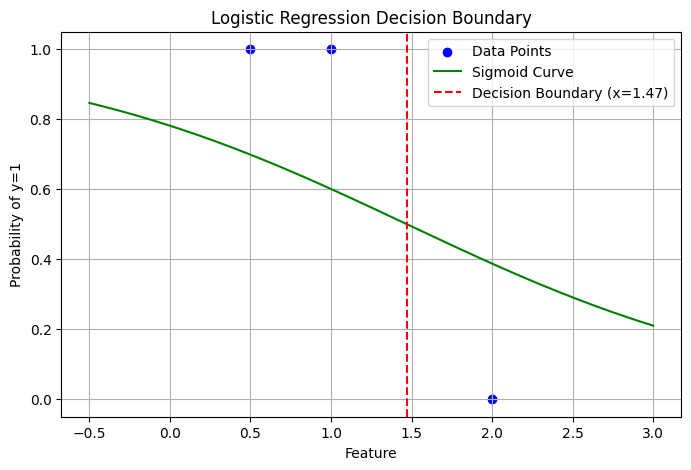

In [83]:
model.plot_decision_boundary()

In [88]:
# Generate synthetic data
np.random.seed(42)  # For reproducibility

# Class 0: X around 2.0 (more negative class)
X0 = np.random.normal(2.0, 0.5, 50).reshape(-1, 1)
y0 = np.zeros(50)

# Class 1: X around 5.0 (more positive class)
X1 = np.random.normal(5.0, 0.5, 50).reshape(-1, 1)
y1 = np.ones(50)

# Combine
X_big = np.vstack((X0, X1))
y_big = np.concatenate((y0, y1))

Iteration 0: Cost=0.643238, w=[0.07804068], b=0.0
Iteration 100: Cost=0.377802, w=[0.59283854], b=-1.4398271266906368
Iteration 200: Cost=0.265546, w=[0.86631352], b=-2.459351759036743
Iteration 300: Cost=0.203904, w=[1.07267695], b=-3.2150388115332635
Iteration 400: Cost=0.165807, w=[1.23650286], b=-3.8092368187792176
Iteration 500: Cost=0.140139, w=[1.3717902], b=-4.29701160869981
Iteration 600: Cost=0.121725, w=[1.48685014], b=-4.7101460157927875
Iteration 700: Cost=0.107884, w=[1.58691262], b=-5.068315848162911
Iteration 800: Cost=0.097101, w=[1.67544723], b=-5.384437939112125
Iteration 900: Cost=0.088460, w=[1.75486033], b=-5.667406189723558


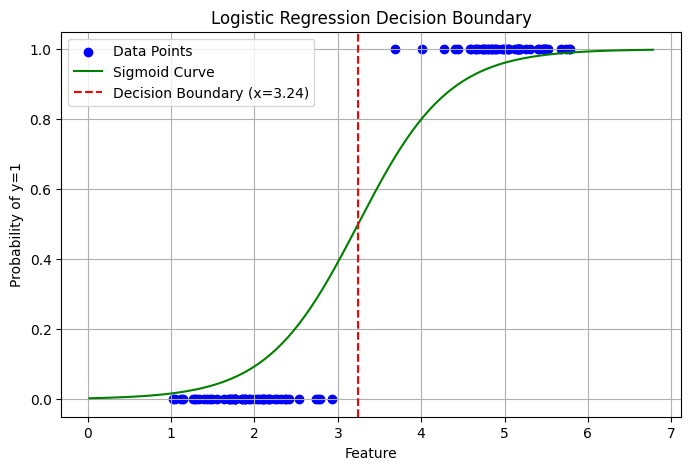

In [89]:
# Initialize and train your logistic regression model
model = LogisticRegression(X_big, y_big)
model.fit(alpha=0.1, num_iters=1000)

# Plot decision boundary
model.plot_decision_boundary()
